## Задача 5. Обучение без учителя

Ершов Александр Сергеевич, гр. 22.М04-мм

Задача:


\+ Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.

\+ Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.

\+ Самостоятельно реализуйте один из алгоритмов кластеризации, например K-means.

\+ Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).

\+ При обучении использовать подбор гиперпараметров.

\+ Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.

\+ * (+3 балла) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.

\+ * (+2 балла) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

### Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.

Датасет "Stock Market Data - Nifty 50 (2000 - 2022)" https://www.kaggle.com/datasets/debashis74017/stock-market-data-nifty-50-2000-2022 c 58 столбцами с данными индекса индийского фондового рынка.

In [1]:
import pandas as pd
data = pd.read_csv("Nifty_50_with_indicators_.csv")

In [2]:
data.head()

,Date,open,high,low,close,sma5,sma10,sma15,sma20,ema5,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,09 Jun 2022,16263.85,16492.80,16243.85,16478.10,15975.71,15693.490,15711.476667,15742.0225,16047.868937,...,89.971687,100.000000,100.000000,54.481072,-1.122652,285.430520,291.00,16404.916667,21.905630,0.543621
1,08 Jun 2022,16474.95,16514.30,16293.35,16356.25,16108.53,15787.785,15748.620000,15760.3450,16150.662625,...,89.109417,80.470659,93.490220,52.508022,-11.875423,280.824768,220.95,16387.966667,21.206620,1.152622
2,07 Jun 2022,16469.60,16487.25,16347.10,16416.35,16245.38,15865.540,15786.363333,15790.6200,16239.225083,...,89.316824,85.879016,88.783225,59.487656,-7.359681,270.776570,140.15,16416.900000,20.847854,0.997493
3,06 Jun 2022,16530.70,16610.95,16444.55,16569.55,16404.41,15987.480,15835.530000,15827.3300,16349.333389,...,86.756643,100.000000,88.783225,59.306695,-2.900074,265.335387,194.60,16541.683333,20.982053,0.989819
4,03 Jun 2022,16761.65,16793.85,16567.90,16584.30,16480.91,16116.560,15894.533333,15868.9425,16427.655592,...,80.219517,100.000000,95.293005,56.144553,-13.011891,262.522145,225.95,16648.683333,21.093135,0.265151


### Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.

In [3]:
data.isnull().sum().sort_values(ascending=False)

Date            0
RSI14           0
macd510         0
macd520         0
macd1020        0
macd1520        0
macd1226        0
MOM10           0
MOM15           0
MOM20           0
ROC5            0
ROC10           0
ROC20           0
PPO             0
RSI8            0
open            0
slowk           0
slowd           0
fastk           0
fastd           0
fastksr         0
fastdsr         0
ULTOSC          0
WILLR           0
ATR             0
Trange          0
TYPPRICE        0
HT_DCPERIOD     0
CCI15           0
CCI10           0
CCI5            0
APO             0
high            0
low             0
close           0
sma5            0
sma10           0
sma15           0
sma20           0
ema5            0
ema10           0
ema15           0
ema20           0
upperband       0
middleband      0
lowerband       0
HT_TRENDLINE    0
KAMA10          0
KAMA20          0
KAMA30          0
SAR             0
TRIMA5          0
TRIMA10         0
TRIMA20         0
ADX5            0
ADX10     

Пропусков в данных нет.

Построим график OHLC (графики баров) для 100 значений.

In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Date'][:100],
                open=data['open'][:100],
                high=data['high'][:100],
                low=data['low'][:100],
                close=data['close'][:100])])

fig.show()

Закодируем Date.

In [5]:
from sklearn.preprocessing import LabelEncoder
data[['Date']] = data[['Date']].apply(LabelEncoder().fit_transform)

In [6]:
data.head()

,Date,open,high,low,close,sma5,sma10,sma15,sma20,ema5,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,1568,16263.85,16492.80,16243.85,16478.10,15975.71,15693.490,15711.476667,15742.0225,16047.868937,...,89.971687,100.000000,100.000000,54.481072,-1.122652,285.430520,291.00,16404.916667,21.905630,0.543621
1,1383,16474.95,16514.30,16293.35,16356.25,16108.53,15787.785,15748.620000,15760.3450,16150.662625,...,89.109417,80.470659,93.490220,52.508022,-11.875423,280.824768,220.95,16387.966667,21.206620,1.152622
2,1196,16469.60,16487.25,16347.10,16416.35,16245.38,15865.540,15786.363333,15790.6200,16239.225083,...,89.316824,85.879016,88.783225,59.487656,-7.359681,270.776570,140.15,16416.900000,20.847854,0.997493
3,1010,16530.70,16610.95,16444.55,16569.55,16404.41,15987.480,15835.530000,15827.3300,16349.333389,...,86.756643,100.000000,88.783225,59.306695,-2.900074,265.335387,194.60,16541.683333,20.982053,0.989819
4,446,16761.65,16793.85,16567.90,16584.30,16480.91,16116.560,15894.533333,15868.9425,16427.655592,...,80.219517,100.000000,95.293005,56.144553,-13.011891,262.522145,225.95,16648.683333,21.093135,0.265151


### Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

Подготовим данные. В качестве целевого признака возьмем `close`.

In [7]:
from sklearn.preprocessing import MinMaxScaler


X = data.drop(columns=["close"])
y = data["close"]

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.280953,0.868249,0.880882,0.874885,0.864876,0.852485,0.859393,0.863442,0.869210,0.863766,...,0.959278,1.000000,1.000000,0.540457,0.995078,0.405351,0.178397,0.881760,0.297347,0.691799
1,0.247805,0.880142,0.882095,0.877698,0.872480,0.857913,0.861547,0.864509,0.875097,0.868844,...,0.949371,0.804707,0.934902,0.495111,0.885834,0.398474,0.134572,0.880798,0.276551,0.731541
2,0.214299,0.879841,0.880569,0.880753,0.880315,0.862389,0.863736,0.866270,0.880169,0.873629,...,0.951754,0.858790,0.887832,0.655523,0.931712,0.383470,0.084022,0.882440,0.265878,0.721417
3,0.180971,0.883283,0.887547,0.886291,0.889420,0.869409,0.866587,0.868406,0.886475,0.879150,...,0.922339,1.000000,0.887832,0.651364,0.977020,0.375345,0.118087,0.889521,0.269870,0.720917
4,0.079914,0.896295,0.897865,0.893301,0.893800,0.876839,0.870009,0.870828,0.890961,0.883822,...,0.847232,1.000000,0.952930,0.578689,0.874288,0.371145,0.137700,0.895593,0.273175,0.673627


Снизим размерность с помощью PCA.

In [8]:
%%time
from sklearn.decomposition import PCA

pca = PCA()
data_pca_2 = pca.fit_transform(X)

CPU times: user 198 ms, sys: 17 ms, total: 215 ms
Wall time: 232 ms


Посмотрим что получилось.

In [33]:
import matplotlib.pyplot as plt
def plot_data(dataframe):
    plt.figure(figsize=(7, 7))
    plt.scatter(
        dataframe[:, 0],
        dataframe[:, 1],
        c=y,
        cmap=plt.colormaps["nipy_spectral"].resampled(10),
        edgecolors="none",
        alpha=0.4)
    plt.colorbar()
    plt.grid(None)

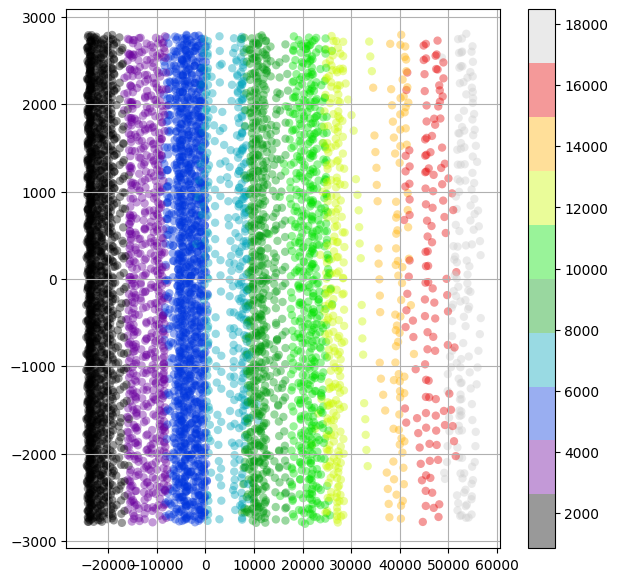

In [34]:
plot_data(data_pca_2)

Снизим размерность с помощью t-SNE.

In [11]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(random_state=19)
data_tsne_2 = tsne.fit_transform(X)

CPU times: user 1min 23s, sys: 448 ms, total: 1min 24s
Wall time: 1min 7s


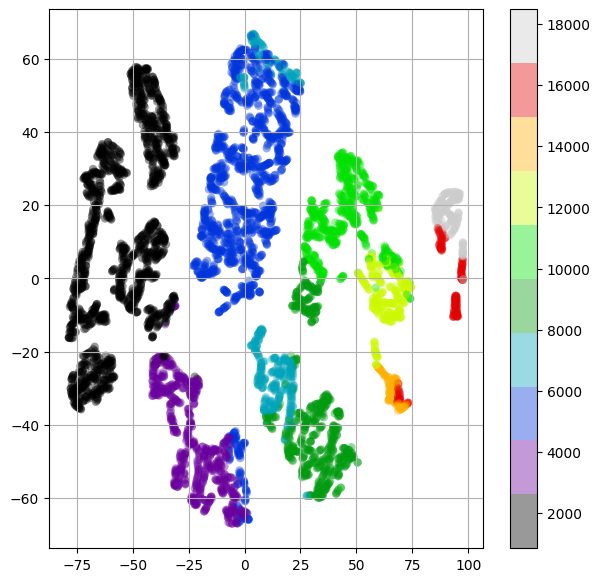

In [35]:
plot_data(data_tsne_2)

По сравнению с PCA алгоритм t-SNE работал на порядок дольше. При этом лучше справился с разделением на кластеры, но все равно есть смешение элементов.

Повторим то же самое, но с размерностью 3.

In [13]:
%%time

pca = PCA(n_components=3)
data_pca_3 = pca.fit_transform(X)

CPU times: user 53.3 ms, sys: 39.9 ms, total: 93.2 ms
Wall time: 79.8 ms


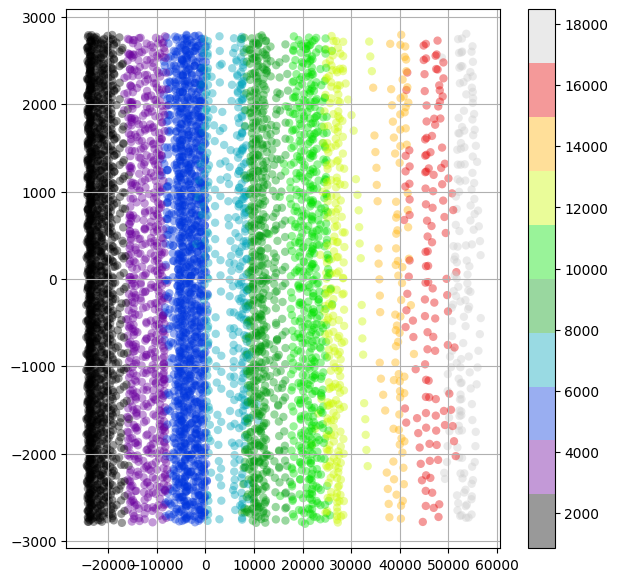

In [36]:
plot_data(data_pca_3)

Результат работы почти такой же, как и для PCA с 2 компонентами. Время работы схожее.

In [15]:
%%time

tsne = TSNE(random_state=19, n_components=3)
data_tsne_3 = tsne.fit_transform(X)

CPU times: user 3min 48s, sys: 386 ms, total: 3min 48s
Wall time: 2min 26s


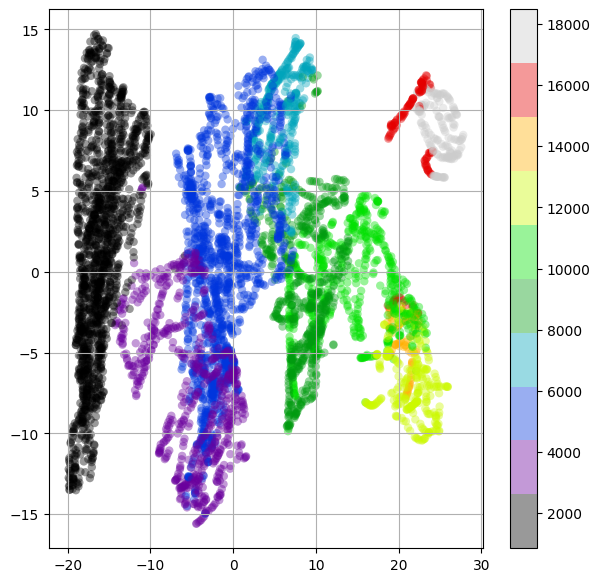

In [37]:
plot_data(data_tsne_3)

Для t-SNE время увеличилось более чем вдвое. Группировка стала менее выраженная, смешение увеличилось.

Посмотрим на дисперсию и зависимость процента сохраненной информации от числа компонент.

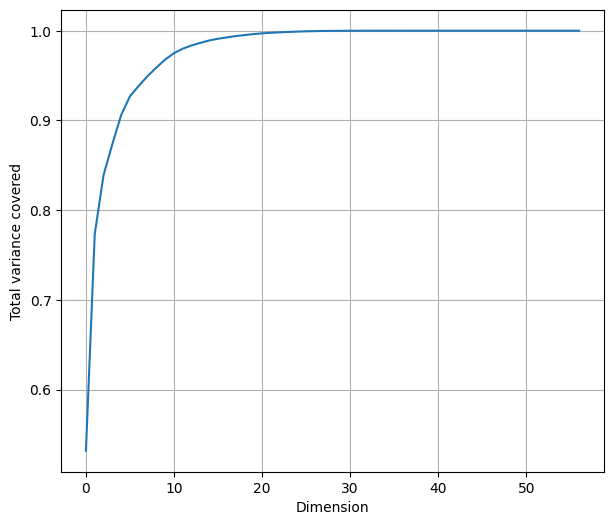

In [17]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plt.figure(figsize=(7, 6))
pca = PCA().fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimension")
plt.ylabel("Total variance covered")
plt.grid(True)

In [18]:
pca = PCA(0.99).fit(df_scaled)
pca.n_components_ 

16

In [19]:
pca = PCA(0.85).fit(df_scaled)
pca.n_components_ 

4

In [20]:
pca = PCA(0.75).fit(df_scaled)
pca.n_components_ 

2

Тогда, для сохранения:
- 99% исходной информации нужно 16 компонент,
- 85% исходной информации нужно 4 компонента,
- 75% исходной информации нужно 2 компоненты.

### Самостоятельно реализуйте один из алгоритмов кластеризации, например K-means.

In [21]:
import numpy.typing as npt
from sklearn.base import BaseEstimator, ClusterMixin
from numpy.random import RandomState


class myKmeans(BaseEstimator, ClusterMixin):
    def __init__(self, k=5, tolerate=1e-3):
        self.k = k
        self.tolerate = tolerate
        self.random_state = RandomState(19)
    
    
    def compute_init_clusters(self, X, k):
        return X[self.random_state.choice(len(X),
                                          size=k,
                                          replace=False), :]
    
        
    def compute_clusters(self, X):
        distance_to_centres = np.linalg.norm(X[..., None] - self.cluster_centers.T,
                                         axis=1)
        return np.argmin(distance_to_centres, axis=1)
    
    
    def compute_centers(self, X):
        # Determine new centroids as the average objects in the current clusters
        centers = np.empty((self.k, self.feature_count))
        for label in np.unique(self.labels_):
            centers[label] = np.mean(X[self.labels_ == label], axis=0)
        return centers
        
        
    def fit(self, X, y=None):
        self.feature_count = X.shape[1]
        self.cluster_centers = self.compute_init_clusters(X, self.k)
        center_position = np.inf
        while not center_position <= self.tolerate:
            self.labels_ = self.compute_clusters(X)
            centers = self.compute_centers(X)
            center_position = np.max(np.linalg.norm(self.cluster_centers - centers,
                                                    axis=1))
            self.cluster_centers = centers
        return self

    
    def predict(self, X):
        return self.compute_clusters(X)

### Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд). При обучении использовать подбор гиперпараметров.

Для обучения будем использоваться следующие датасеты:
- оригинальный,
- со сниженными с помощью PCA размерностями 16, 4, 2.

In [22]:
X_reduced_pca = [X.to_numpy(dtype=np.float64)]
for reduced_dims in [16, 4, 2]:
    pca = PCA(n_components=reduced_dims)
    X_pca_transform = pca.fit_transform(X)
    X_reduced_pca.append(X_pca_transform)

При подборе гиперпараметров будет ориентироваться на три метрики: ARI (Adjusted Rand Index), AMI (Adjusted Mutual Information), FMI (Fowlkes-Mallows Index).

In [23]:
import pathlib
import itertools
import time
from sklearn.base import clone
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score

results_path = pathlib.Path("hyper_params_board.csv")

def check_score(best, current):
    return best == None or current > best[0]


def combine_params(params):
    return [
        dict(params) for params in
        itertools.product(
            *([(name, v) for v in vs] for (name, vs) in params.items())
        )
    ]


def print_res(size, ari, ami, fmi):
        print(f"Dimension: {size}:",
        f"ARI: {ari[2]}",
        f"AMI: {ami[2]}",
        f"FMI: {fmi[2]}",
        "",
        sep="\n",
    )


def generate_res(estimator, size, ari_best, ami_best, fmi_best):
    best_time = np.mean([ari_best[1], ami_best[1], fmi_best[1]])
    return {
        "Name": estimator.__class__.__name__,
        "Dimension": size,
        "Time (s)": best_time,
        "ARI": ari_best[0],
        "AMI": ami_best[0],
        "FMI": fmi_best[0],
    }


def test_estimator(estimator, params = None):
    params = params if params is not None else {}
    param_combs = combine_params(params)
    
    results = []
    for X in X_reduced_pca:
        ari_best = None
        ami_best = None
        fmi_best = None

        size = X.shape[1]
        for params in param_combs:
            estimator_clone = clone(estimator).set_params(**params)

            start_t = time.perf_counter()
            pred = estimator_clone.fit_predict(X)
            fit_predict_time = (time.perf_counter() - start_t)

            ari = adjusted_rand_score(y, pred)
            if check_score(ari_best, ari):
                ari_best = ari, fit_predict_time, params

            ami = adjusted_mutual_info_score(y, pred)
            if check_score(ami_best, ami):
                ami_best = ami, fit_predict_time, params

            fmi = fowlkes_mallows_score(y, pred)
            if check_score(fmi_best, fmi):
                fmi_best = fmi, fit_predict_time, params
            
        results.append(generate_res(estimator, size, ari_best, ami_best, fmi_best))

    pd.DataFrame(results).to_csv(results_path, mode="a", header=not results_path.exists())

Обучение реализации KMeans.

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
model = myKmeans(k=10)
test_estimator(model)

Обучение sklearn реализации KMeans.

In [26]:
%%time
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, n_init="auto", random_state=19)
hparams = {
        "algorithm": ["elkan", "lloyd"],
        "max_iter": [100, 250, 500]
    }

test_estimator(model, hparams)

CPU times: user 8.37 s, sys: 2.15 s, total: 10.5 s
Wall time: 8 s


Обучение sklearn реализации DBSCAN.

In [27]:
%%time
from sklearn.cluster import DBSCAN

model = DBSCAN(n_jobs=-1)
hparams ={
    "eps": [100, 250, 500, 1000],
    "min_samples": [5, 25, 50, 100, 200],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [10, 30, 60, 90]
}

test_estimator(model, hparams)

CPU times: user 8min 38s, sys: 4.37 s, total: 8min 43s
Wall time: 7min 11s


### Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.

In [29]:
import seaborn as sns

results = pd.read_csv(results_path)
results

,Unnamed: 0,Name,Dimension,Time (s),ARI,AMI,FMI
0,0,myKmeans,57,1.037860,0.000185,0.012759,0.009772
1,1,myKmeans,16,0.265073,0.000185,0.012759,0.009772
2,2,myKmeans,4,0.125023,0.000185,0.012759,0.009772
3,3,myKmeans,2,0.120133,0.000185,0.012759,0.009773
4,0,KMeans,57,0.071617,0.000185,0.013572,0.010093
5,1,KMeans,16,0.081072,0.000188,0.013740,0.010207
6,2,KMeans,4,0.127374,0.000171,0.013608,0.009861
7,3,KMeans,2,0.018366,0.000163,0.013298,0.009574
8,0,DBSCAN,57,0.175812,0.000103,0.011274,0.007822
9,1,DBSCAN,16,0.221430,0.000107,0.011547,0.008003


Построим графики.

<Axes: title={'center': 'Time (s)'}, xlabel='Dimension', ylabel='Time (s)'>

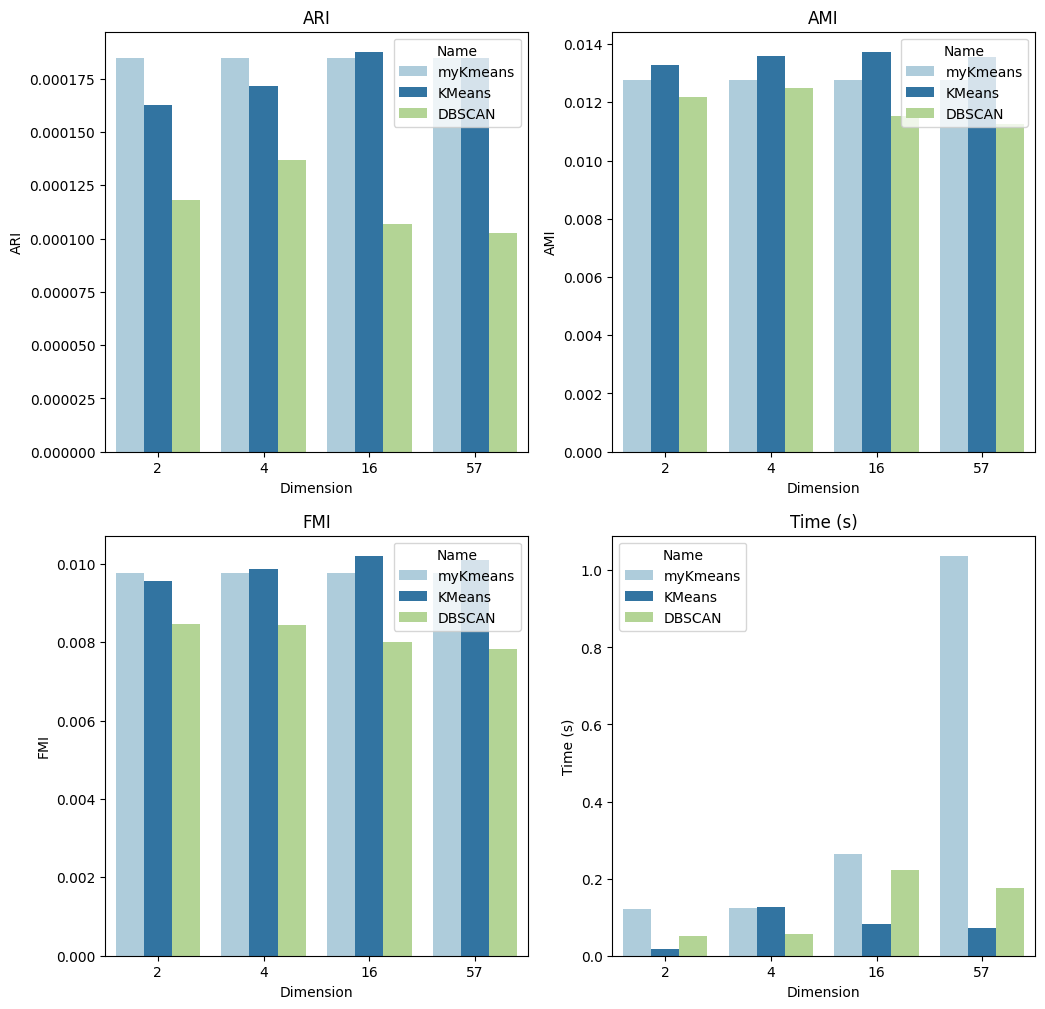

In [30]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title("ARI")
sns.barplot(results, x="Dimension", y="ARI", hue="Name", palette="Paired")

plt.subplot(2, 2, 2)
plt.title("AMI")
sns.barplot(results, x="Dimension", y="AMI", hue="Name", palette="Paired")

plt.subplot(2, 2, 3)
plt.title("FMI")
sns.barplot(results, x="Dimension", y="FMI", hue="Name", palette="Paired")

plt.subplot(2, 2, 4)
plt.title("Time (s)")
sns.barplot(results, x="Dimension", y="Time (s)", hue="Name", palette="Paired")


Что видно по графикам:
- Уменьшение размерности снижает необходимое для обучения время, не ухудшая заметно результаты.
- Быстрее всех обучается библиотечная KMeans, кроме размерности 4, медленее всех - реализация KMeans.
- По совокупности метрик лучше всего показала себя библиотечная KMeans, за ней  - библиотечная DBSCAN. При этом результаты KMeans также не очень хорошие.